#### IMPORTING LIBRARIES 

In [1]:
#basic imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#for modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [3]:
df=pd.read_csv("data/StdsPerform.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
x=df.drop('math score',axis=1)
y=df['math score']

In [6]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
#create column transformer  with 3 types of transformers
num__features=x.select_dtypes(exclude="object").columns
cat_features=x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor= ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScalar",numeric_transformer,num__features),
        
    ]
)

In [8]:
x=preprocessor.fit_transform(x)

In [9]:
#separate dataset into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

#### Create an Evaluate function to give all the meterics after model training

In [10]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true,predicted)
    return mae,rmse,r2

In [11]:
models={
    "Linear Regression" : LinearRegression(), 
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor " : RandomForestRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor(),
    # "CatBoosting Regressor" : CatBoostRegressor(verbose=0),
    "Xgboost Regressor" : XGBRegressor()
}
model_list =[]
r2_list=[]

for i in range(len(list(models))):
    model =list(models.values())[i]
    model.fit(x_train,y_train) #train model

    #make predictions
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    

    #evaluate train and test dataset
    model_train_mae,model_train_rmse,model_train_r2 =evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2 =evaluate_model(y_test,y_test_pred)
     
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2) 


    print("Model performance for trainig set")
    print("root mean squared error : {:.4f}".format(model_train_rmse))
    print("mean absolute error : {:.4f}".format(model_train_mae))
    print(" R2 score : {:.4f}".format(model_train_r2))
    
    print("-"*35)


    print("Model performance for testing set")
    print("root mean squared error : {:.4f}".format(model_test_rmse))
    print("mean absolute error : {:.4f}".format(model_test_mae))
    print(" R2 score : {:.4f}".format(model_test_r2))
    print("="*35)
    print("\n")






Linear Regression
Model performance for trainig set
root mean squared error : 5.3231
mean absolute error : 4.2667
 R2 score : 0.8743
-----------------------------------
Model performance for testing set
root mean squared error : 5.3940
mean absolute error : 4.2148
 R2 score : 0.8804


Lasso
Model performance for trainig set
root mean squared error : 6.5938
mean absolute error : 5.2063
 R2 score : 0.8071
-----------------------------------
Model performance for testing set
root mean squared error : 6.5197
mean absolute error : 5.1579
 R2 score : 0.8253


Ridge
Model performance for trainig set
root mean squared error : 5.3233
mean absolute error : 4.2650
 R2 score : 0.8743
-----------------------------------
Model performance for testing set
root mean squared error : 5.3904
mean absolute error : 4.2111
 R2 score : 0.8806


K-Neighbors Regressor
Model performance for trainig set
root mean squared error : 5.7077
mean absolute error : 4.5167
 R2 score : 0.8555
-----------------------------

#### RESULTS

In [12]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=["Model name","R2_Score"]).sort_values(by=["R2_Score"],ascending=False)

,Model name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.851144
6,Adaboost Regressor,0.846862
7,Xgboost Regressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.743629


#### LINEAR REGRESSION

In [13]:
linear_model=LinearRegression(fit_intercept=True)
linear_model=linear_model.fit(x_train,y_train)
y_pred=linear_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("accuracy of model is %0.2f" %score)



accuracy of model is 88.04


#### PLOT : y_pred vs y_test

Text(0.5, 1.0, 'Actual vs Predicted Values')

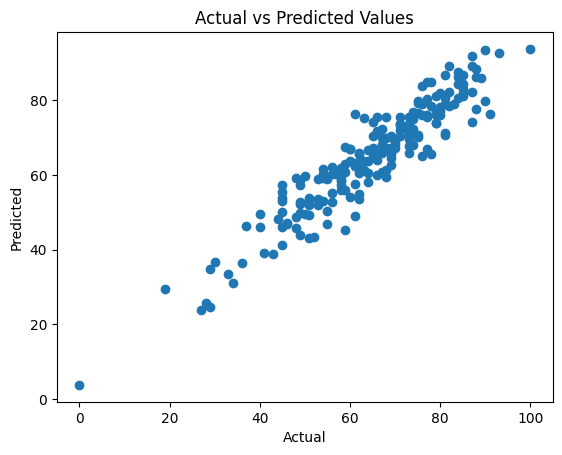

In [14]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("Actual vs Predicted Values")


<Axes: xlabel='math score'>

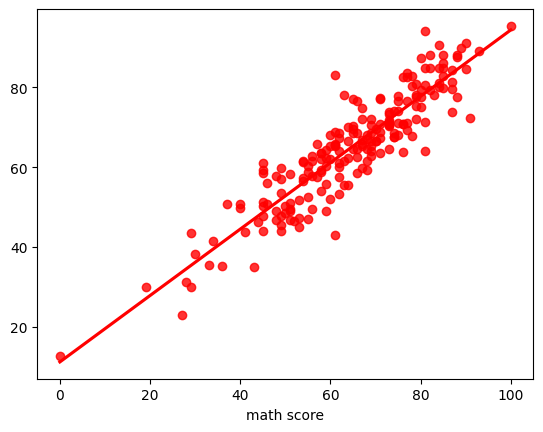

In [ ]:
sns.regplot(x=y_test, y=y_test_pred, ci=None, color='red')

##### Difference Between Actual and Predicted Values

In [18]:
pred_df=pd.DataFrame({'ACtaual value':y_test,'Predicted value':y_pred,'Difference': y_test-y_pred})
pred_df

,ACtaual value,Predicted value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
